## Masking

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

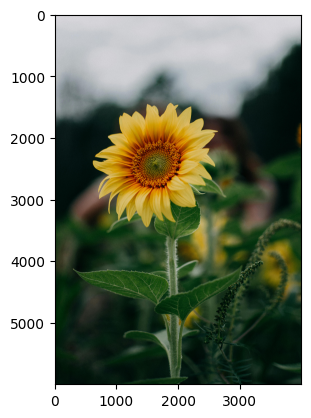

In [ ]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image_processing_batch-2/images/pexels-maxandrey-1366630.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

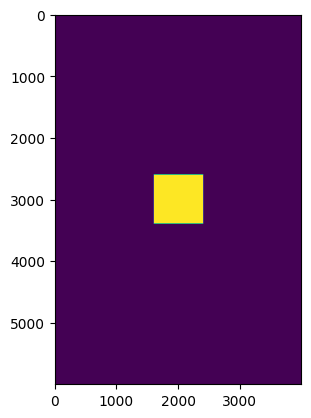

In [ ]:
# Get the dimensions of the image
height, width, _ = image.shape

# Create a binary mask of the same size as the image, initialized to zeros (black)
mask = np.zeros((height, width), dtype=np.uint8)

# Define the size and position of the square
square_size = 800  # Size
top_left_x = (width - square_size) // 2 # position x
top_left_y = (height - square_size) // 2 # position y

# Create a white square in the mask
mask[top_left_y:top_left_y + square_size, top_left_x:top_left_x + square_size] = 255

plt.imshow(mask)

# Convert the mask to a 3-channel mask
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

# plt.imshow(mask_3channel)

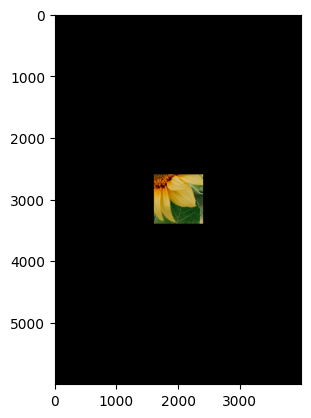

In [ ]:
# Multiply the original image with the mask
result = cv2.bitwise_and(image, mask_rgb)

# Display the original image, mask, and result
# plt.imshow(image)
plt.imshow(result)

## Filtering

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
arr = [
    [1,1,1],
    [1,1,1],
    [1,1,1]
    ]
kernel = np.array(arr, dtype=np.float32)
print(kernel)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [ ]:
kernel = np.ones((3,3), np.float32)
print(kernel)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [ ]:
kernel = kernel/9
print(kernel)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


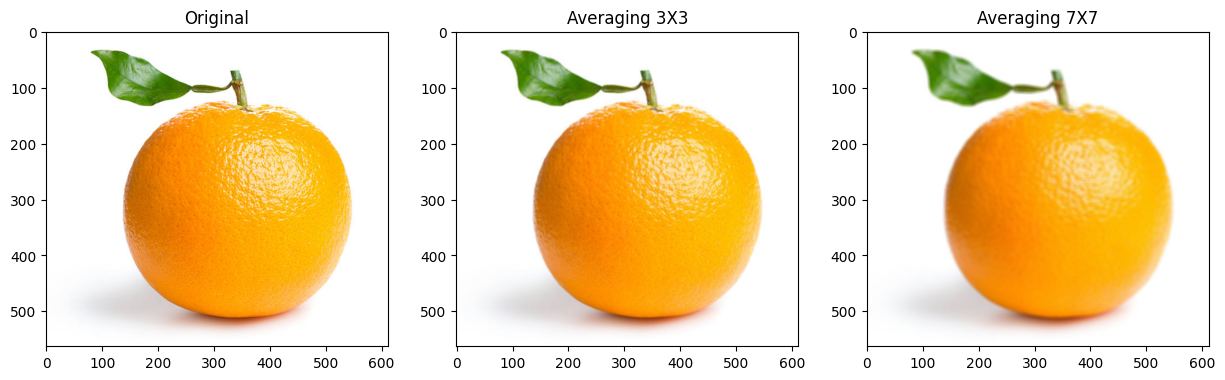

In [ ]:
# using filter2d

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image_processing_batch-2/images/orange-1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel1 = np.ones((3,3),np.float32)/9
blur_img1 = cv2.filter2D(img,-1,kernel1) # when ddepth=-1, the output image will have the same depth as the source.

kernel2 = np.ones((7,7),np.float32)/49
blur_img2 = cv2.filter2D(img,-1,kernel2)

plt.figure(figsize=(15, 5))

plt.subplot(131),plt.imshow(img),plt.title('Original')
# plt.axis('off')
plt.subplot(132),plt.imshow(blur_img1),plt.title('Averaging 3X3')
# plt.axis('off')
plt.subplot(133),plt.imshow(blur_img2),plt.title('Averaging 7X7')
# plt.axis('off')
plt.show()

In [ ]:
np.min(blur_img1)

3

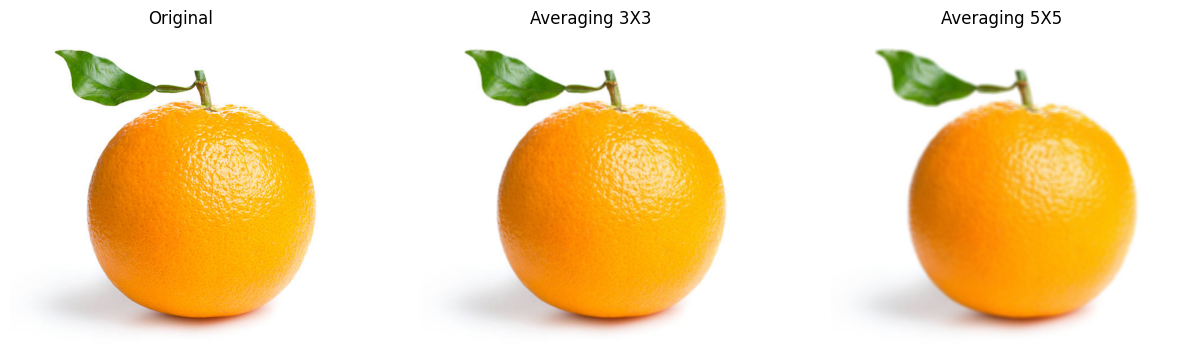

In [ ]:
# using cv2.blur(img, (k,k))

assert img is not None, "file could not be read, check with os.path.exists()"

blur_img1 = cv2.blur(img, (3, 3))

blur_img2 = cv2.blur(img, (7, 7))

plt.figure(figsize=(15, 5))

plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.axis('off')
plt.subplot(132),plt.imshow(blur_img1),plt.title('Averaging 3X3')
plt.axis('off')
plt.subplot(133),plt.imshow(blur_img2),plt.title('Averaging 5X5')
plt.axis('off')
plt.show()